# 442 Poisson Fit

In [38]:
import sys
sys.executable

'/usr/bin/python'

In [48]:
#Import useful librarie and functions to use in your analysis
import numpy as np
import matplotlib.pyplot as plt

from ROOT import TCanvas, TGraphErrors, TF1, TH1F, gStyle, TMath
from ROOT import gROOT
from array import array

In [49]:
# Random data points with Poisson distribution with mean 100 - put your data points here

data = [ 0.2,
0.8,
1.6,
0.5,
0.7,
0.9,
1,
0.9,
0.5,
0.5,
0.7,
0.9,
1.2,
0.3,
1.3,
0.5,
0.2,
1.6,
0.1,
1.4,
1.2,
1.1,
0.4,
0.5,
0.4,
0.7,
1.1,
1.2,
1.8,
0.5,
1.5,
0.7,
1.3,
0.5,
0.5,
1.7,
1.2,
0.1,
0.5,
0.1,
0.3,
0.9,
1.6,
3,
0.9,
1.8,
1.4,
1.2,
1.7,
0.7,
0.5,
0.4,
0.9,
0.9,
0.6,
1.6,
0.8,
1.2,
0.3,
2.2,
3,
0.7,
0.7,
0.2,
0.2,
2.2,
0.9,
2.9,
0.4,
1.1,
1,
0.4,
1,
0.4,
1.2,
0.3,
1.5,
1.9,
1.9,
2.4,
0.3,
0.6,
1.1,
0.9,
0.5,
1,
0.4,
0.5,
0.6,
0.6,
2.2,
1.6,
1.4,
0.8,
1.1,
0.2,
1.8,
0.4,
0.5,
0.1,
0.7,
0.4,
0.9,
0.9,
1,
3.2,
1,
0.6,
0.2,
1,
0.5,
0.7,
0.3,
0.6,
2.4,

]

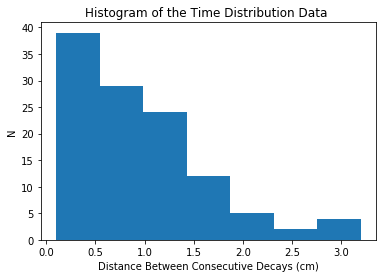

In [99]:
#Plot the histogram of your data with a given bin number (here 20)
plt.figure()
plt.hist(data,7)
plt.ylabel("N")
plt.xlabel("Distance Between Consecutive Decays (cm)")
plt.title("Histogram of the Time Distribution Data ")

plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TROOT::Append>: Replacing existing TH1: Hist Fit Data (Potential memory leak).


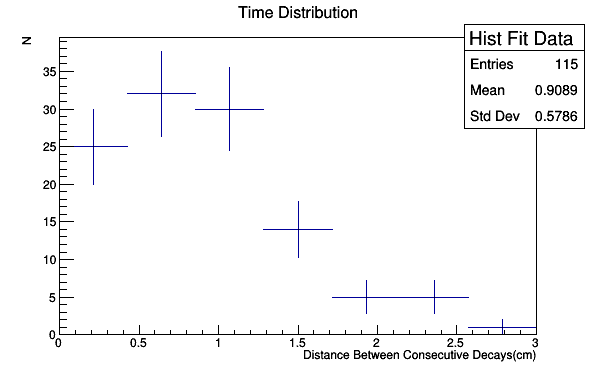

In [101]:
c2 = TCanvas('c2', 'Exp Decay Graph', 200, 10, 600, 400)
histo= TH1F("Hist Fit Data","Time Distribution", 7, 0, 3)
histo.GetYaxis().SetTitle("N")
histo.GetXaxis().SetTitle("Distance Between Consecutive Decays(cm)")
for data_point in data:
    histo.Fill(data_point)
histo.Draw("E")

c2.Draw()

 FCN=107.528 FROM MINOS     STATUS=SUCCESSFUL     30 CALLS         295 TOTAL
                     EDM=4.49029e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.00000e+02   4.24264e+01   4.24264e+01   0.00000e+00
   2  p1           1.53225e+00   2.01581e+00   2.01581e+00  -4.52959e-08


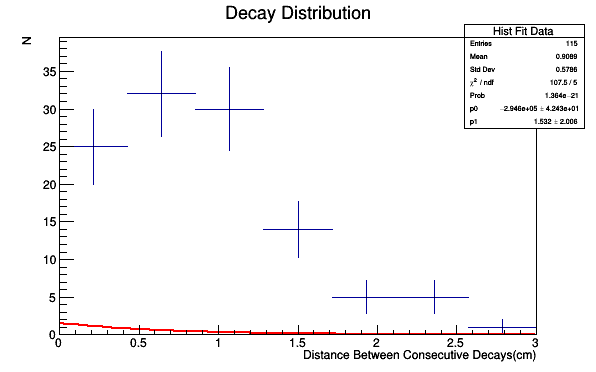

In [105]:
fexp = TF1("fexp","[1]*TMath::Exp([1]*-x)")
fexp.SetParameters(100,0.001) 
fexp.SetFillColor(41)
histo.Fit("fexp","E")
histo.SetTitle("Decay Distribution")

histo.Draw("E")

c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: Hist Fit Data (Potential memory leak).


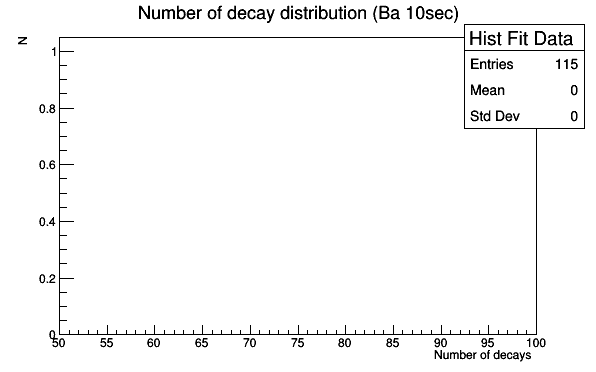

In [53]:
#Create a canvas to draw your histograms and functions
c1 = TCanvas( 'c1', 'Poisson Graph', 200, 10, 600, 400 ) 

#define a histogram with 20 bins between 60-120 (Change these values according to your data sets!!!)
histo = TH1F("Hist Fit Data", "Number of decay distribution (Ba 10sec)", 10, 50, 100) 

#Label the X-Y axis
histo.GetYaxis().SetTitle("N")
histo.GetXaxis ().SetTitle ("Number of decays ");

#Fill the randomly generated data into your histogram
for data_point in data:
    histo.Fill(data_point)

#Draw your histogram with error bars and draw it on the canvas
histo.Draw("E")
c1.Draw()

Warning in <Fit>: Fit data is empty 


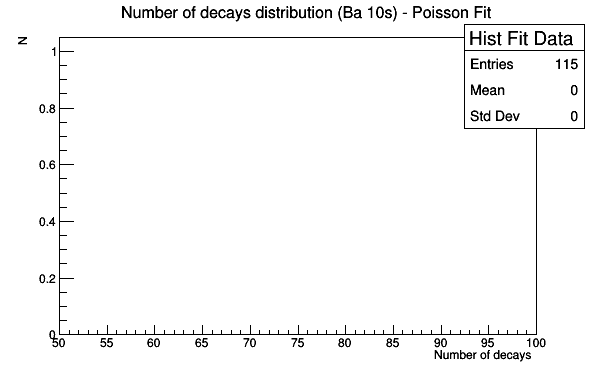

In [55]:
# Define the Poisson function from TMath library in ROOT to fit with two parameters:
#[0]: normalizing constant
#[1]: mean
fpois = TF1("fpois","[0]*TMath::Poisson(x,[1])",50,100) #(Change interval values (60,120) according to your data sets!!!)

#Set the parameters to guide the ROOT fitter to converge easily and fit your histogram
fpois.SetParameters(10, 100) # give reasonable estimates for your parameters to guide ROOT fit to converge
fpois.SetFillColor(41);
histo.Fit("fpois", "E")
histo.SetTitle("Number of decays distribution (Ba 10s) - Poisson Fit")
#Set the options to display fit parameters and chi_squared value on the graph
gStyle.SetOptFit(1111)

c1.Draw()

Warning in <Fit>: Fit data is empty 


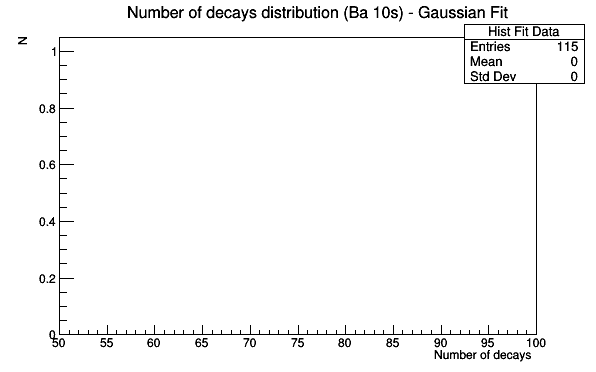

In [13]:
#Do the similar procedure for Gaussian function (which now has 3 parameters: normalization, mean, standard dev.)
fgaus = TF1("fgaus","gaus")
fgaus.SetParameters(10, 60, 5) # give reasonable estimates for your parameters to guide ROOT fit to converge
fgaus.SetFillColor(45);
histo.Fit("fgaus", "E")
histo.SetTitle("Number of decays distribution (Ba 10s) - Gaussian Fit")
#histo.Draw("same")
c1.Draw("same")